In [ ]:
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count 
from PIL import Image 

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

env = gym.make('CartPole-v1').unwrapped 
plt.ion()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from matplotlib import font_manager
font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

C:\Users\516-08\anaconda3\envs\torch_book\lib\site-packages\torchvision\transforms\transforms.py:280: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


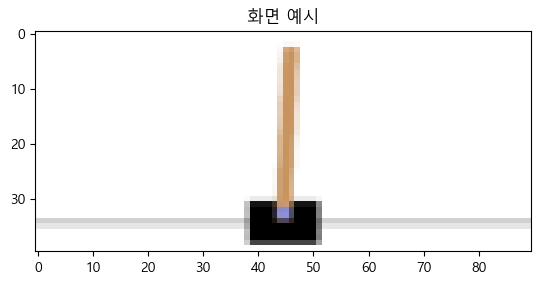

In [3]:
import pyglet
from PIL import Image

env = gym.make('CartPole-v1', render_mode='rgb_array').unwrapped

resize = T.Compose([T.ToPILImage(),
T.Resize(40, interpolation=Image.BICUBIC),
T.ToTensor()])

def get_cart_location(screen_width):
    world_width = env.x_threshold * 2
    scale = screen_width / world_width
    return int(env.state[0] * scale + screen_width / 2.0)

def get_screen():
    screen = env.render().transpose((2, 0, 1))
    _, screen_height, screen_width = screen.shape
    screen = screen[:, int(screen_height*0.4):int(screen_height * 0.8)]
    view_width = int(screen_width * 0.6)
    cart_location = get_cart_location(screen_width)
    
    if cart_location < view_width // 2:
        slice_range = slice(view_width)
    elif cart_location > (screen_width - view_width // 2):
        slice_range = slice(-view_width, None)
    else:
        slice_range = slice(cart_location - view_width // 2, cart_location + view_width // 2)
    screen = screen[:, :, slice_range]
    screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
    screen = torch.from_numpy(screen)
    return resize(screen).unsqueeze(0).to(device)

env.reset()
plt.figure()
plt.imshow(get_screen().cpu().squeeze(0).permute(1, 2, 0).numpy(), interpolation='none')
plt.title('화면 예시')
plt.show()

In [4]:
boarder = {'1':' ','2':' ','3':' ','4':' ','5':' ','6':' ','7':' ','8':' ','9':' '}
board_keys = []

for key in boarder:
    board_keys.append(key)

In [5]:
def visual_Board(board_num):
    print(board_num['1'] + '|' + board_num['2'] + '|' + board_num['3'])
    print('-+-+-')
    print(board_num['4'] + '|' + board_num['5'] + '|' + board_num['6'])
    print('-+-+-')
    print(board_num['7'] + '|' + board_num['8'] + '|' + board_num['9'])

In [6]:
def game():
    turn = 'X'
    count = 0
    for i in range(8):
        visual_Board(boarder)
        print("당신 차례" + turn + ". 어디로 이동할까요")
        move = input()
        if boarder[move] == ' ':
            boarder[move] = turn
            count += 1
        else:
            print("이미 채워져있습니다.")
            continue

        if count >= 5:
            if boarder['1'] == boarder['2'] == boarder['3'] != ' ':
                visual_Board(boarder)
                print('\n게임종료.\n')
                print('--------------' + turn + '가 승리했습니다. ----------')
                break
            elif boarder['4'] == boarder['5'] == boarder['6'] != ' ':
                visual_Board(boarder)
                print('\n게임종료.\n')
                print('--------------' + turn + '가 승리했습니다. ----------')
                break
            elif boarder['7'] == boarder['8'] == boarder['9'] != ' ':
                visual_Board(boarder)
                print('\n게임종료.\n')
                print('--------------' + turn + '가 승리했습니다. ----------')
                break
            elif boarder['3'] == boarder['5'] == boarder['7'] != ' ':
                visual_Board(boarder)
                print('\n게임종료.\n')
                print('--------------' + turn + '가 승리했습니다. ----------')
                break

        if count == 9:
            print('게임종료')
            print('동점')

        if turn == 'X':
            turn = 'Y'
        else:
            turn = 'X'

    if __name__ == "__main__":
        game()
        

In [ ]:
game()

 | | 
-+-+-
 | | 
-+-+-
 | | 
당신 차례X. 어디로 이동할까요


 3


 | |X
-+-+-
 | | 
-+-+-
 | | 
당신 차례Y. 어디로 이동할까요


 1


Y| |X
-+-+-
 | | 
-+-+-
 | | 
당신 차례X. 어디로 이동할까요


 5


Y| |X
-+-+-
 |X| 
-+-+-
 | | 
당신 차례Y. 어디로 이동할까요


 2


Y|Y|X
-+-+-
 |X| 
-+-+-
 | | 
당신 차례X. 어디로 이동할까요


 7


Y|Y|X
-+-+-
 |X| 
-+-+-
X| | 

게임종료.

--------------X가 승리했습니다. ----------
Y|Y|X
-+-+-
 |X| 
-+-+-
X| | 
당신 차례X. 어디로 이동할까요
